![Pandas logo](img/pandas.svg)

# Basic plots

The introduction to Pandas showed a couple simple plots.  Let's look at a few others as well. More advanced plotting will be discussed in the lessons on Matplotlib.


In [1]:
%matplotlib inline
import pandas as pd
from src.training import *

In [2]:
cancer = pd.read_csv('data/wisconsin.csv')            
cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,...,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign?
0,17.99,10.38,122.80,1001.0,0.11840,...,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,...,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,...,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,...,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,...,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,...,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,...,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,...,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,...,0.9387,0.2650,0.4087,0.12400,0


## Histograms

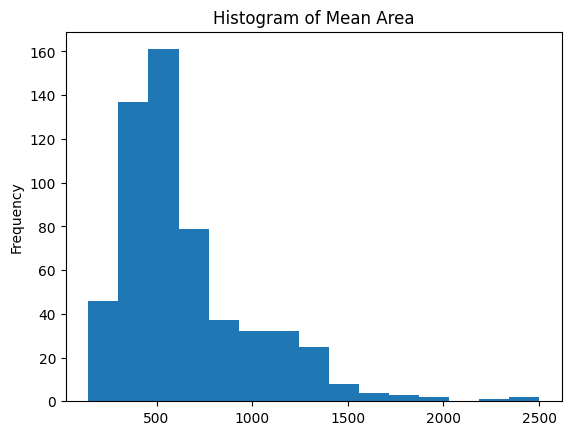

In [7]:
cancer['mean area'].plot(kind='hist', title="Histogram of Mean Area", bins=15); None

<Axes: ylabel='Frequency'>

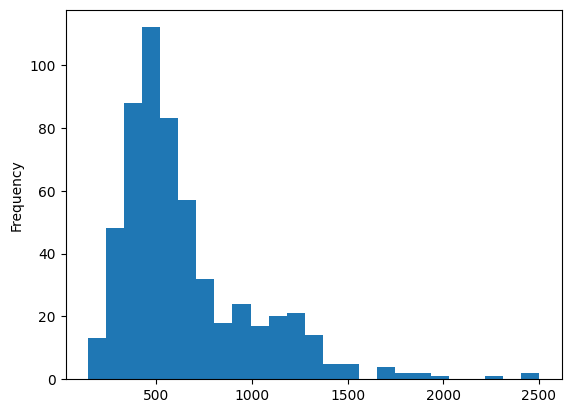

In [5]:
cancer['mean area'].plot.hist(bins=25)

## Bar charts

Basic bar charts are simple in Pandas.  To fine tune the results (such as using dual-Y axes), you need to utilize the underlying Matplotlib capabilities outside of Pandas itself.

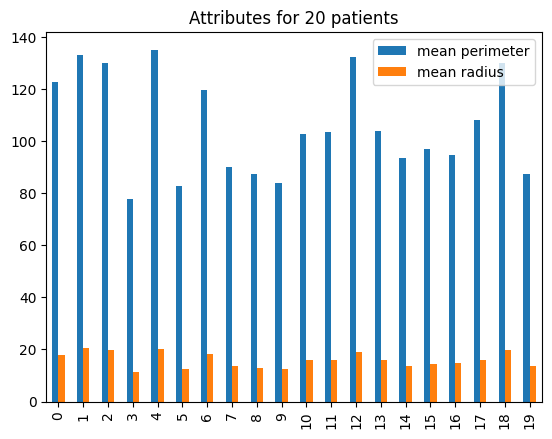

In [6]:
(cancer.loc[:19, ["mean perimeter", "mean radius"]]
     .plot(kind="bar", title="Attributes for 20 patients")
);

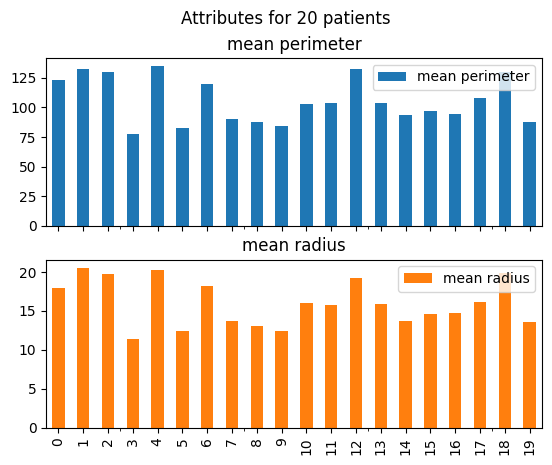

In [8]:
(cancer.loc[:19, ["mean perimeter", "mean radius"]]
     .plot(kind="bar", title="Attributes for 20 patients",
           subplots=True)
);

## Scatter plots

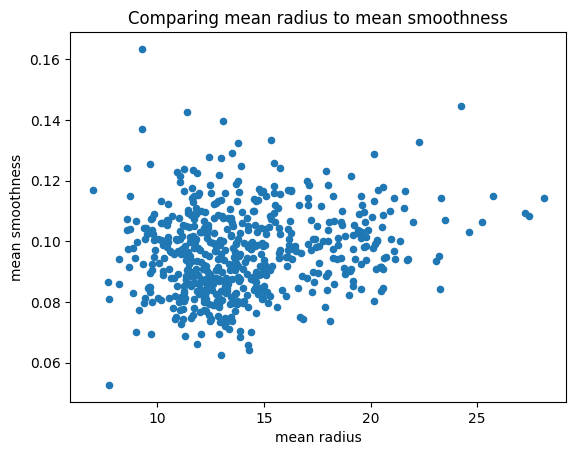

In [9]:
cancer.plot(
    kind="scatter", 
    x="mean radius", 
    y="mean smoothness",
    title="Comparing mean radius to mean smoothness",
);

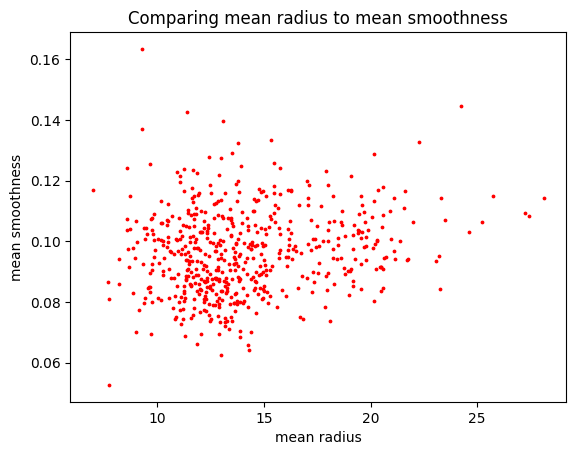

In [10]:
cancer.plot(
    kind="scatter", 
    x="mean radius", 
    y="mean smoothness",
    title="Comparing mean radius to mean smoothness",
    s=3,  # marker size smaller than default
    color="red"
);

### Hex binning

In this example and resolution, the default hexagons are largely just scatter points.

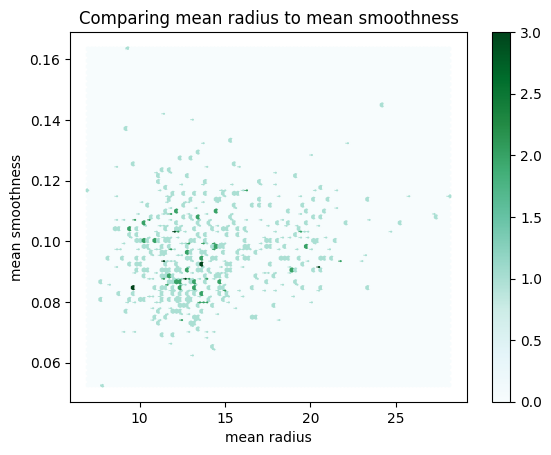

In [11]:
cancer.plot(
    kind="hexbin", 
    x="mean radius", 
    y="mean smoothness",
    title="Comparing mean radius to mean smoothness",
);

By using a somewhat coarser grid, we can see meaningful distinctions among regions.

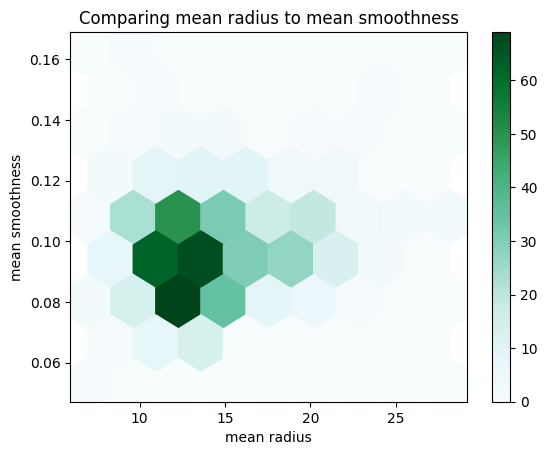

In [12]:
cancer.plot(
    kind="hexbin", 
    x="mean radius", 
    y="mean smoothness",
    title="Comparing mean radius to mean smoothness",
    gridsize=8);

An alternate spelling of most kinds of plots is with methods named after the kind, e.g.:

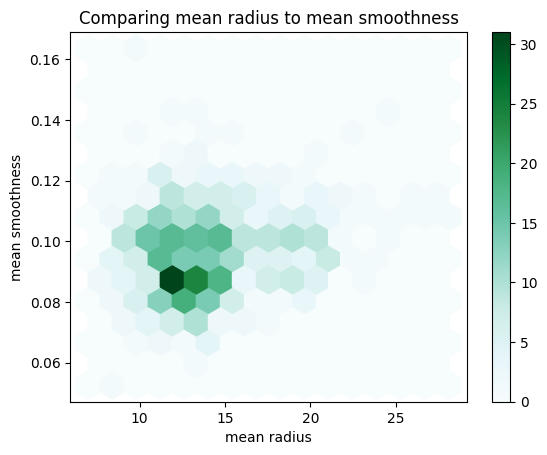

In [13]:
cancer.plot.hexbin(
    x="mean radius",
    y="mean smoothness",
    title="Comparing mean radius to mean smoothness",
    gridsize=15
);

## Statistical distributions

Box plots are a quick way to visualize distributions of features.  If the additional module `scipy` is installed, some additional plots such as KDEs are available.

In [14]:
# Find a few features with similar numeric size
m = cancer.mean()
m[(m > 10) & (m < 20)]

mean radius     14.127292
mean texture    19.289649
worst radius    16.269190
dtype: float64

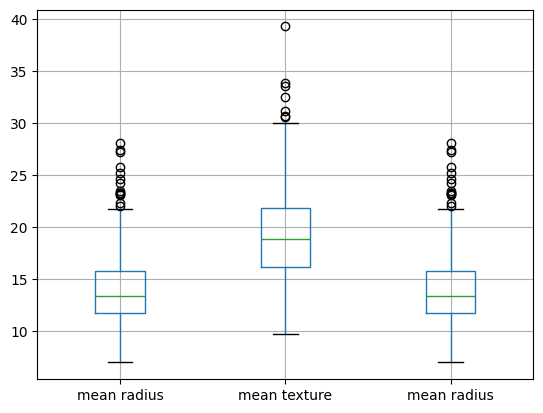

In [15]:
cancer[["mean radius", "mean texture", "mean radius"]].boxplot();